# **Import Libraries and Load Data**  

In [2]:
# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score,accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV

In [3]:
# Load the dataset
df = pd.read_excel(r'/content/drive/MyDrive/Colab Notebooks/AnomaData.xlsx')



# **Problem Understanding**
**Objective**:
Predict machine breakdowns by detecting anomalies in the dataset using binary labels (y where 1 = anomaly, 0 = normal).

**Challenge**:
Managing class imbalance (common in anomaly detection), optimizing feature engineering, and ensuring the model generalizes well.

In [4]:
# Display basic information
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18398 entries, 0 to 18397
Data columns (total 62 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   time    18398 non-null  datetime64[ns]
 1   y       18398 non-null  int64         
 2   x1      18398 non-null  float64       
 3   x2      18398 non-null  float64       
 4   x3      18398 non-null  float64       
 5   x4      18398 non-null  float64       
 6   x5      18398 non-null  float64       
 7   x6      18398 non-null  float64       
 8   x7      18398 non-null  float64       
 9   x8      18398 non-null  float64       
 10  x9      18398 non-null  float64       
 11  x10     18398 non-null  float64       
 12  x11     18398 non-null  float64       
 13  x12     18398 non-null  float64       
 14  x13     18398 non-null  float64       
 15  x14     18398 non-null  float64       
 16  x15     18398 non-null  float64       
 17  x16     18398 non-null  float64       
 18  x17   

# **Data Cleaning**

In [5]:
# Drop redundant column if `y.1` is identical to `y`
if (df['y'] == df['y.1']).all():
    df.drop(columns=['y.1'], inplace=True)

In [6]:
# Ensure `time` is in datetime format
df['time'] = pd.to_datetime(df['time'])

In [7]:
# Set `time` as the index (optional, for time-series analysis)
df.set_index('time', inplace=True)

In [8]:
df

y        x1        x2        x3          x4        x5  \
time                                                                         
1999-05-01 00:00:00  0  0.376665 -4.596435 -4.095756   13.497687 -0.118830   
1999-05-01 00:02:00  0  0.475720 -4.542502 -4.018359   16.230659 -0.128733   
1999-05-01 00:04:00  0  0.363848 -4.681394 -4.353147   14.127997 -0.138636   
1999-05-01 00:06:00  0  0.301590 -4.758934 -4.023612   13.161566 -0.148142   
1999-05-01 00:08:00  0  0.265578 -4.749928 -4.333150   15.267340 -0.155314   
...                 ..       ...       ...       ...         ...       ...   
1999-05-28 23:58:00  0 -0.877441  0.786430  0.406426  135.301215  0.112295   
1999-05-29 00:00:00  0 -0.843988  0.633086  0.561918  133.228949  0.141332   
1999-05-29 00:02:00  0 -0.826547  0.450126  0.334582  134.977973  0.170370   
1999-05-29 00:04:00  0 -0.822843  0.419383  0.387263  135.658942  0.199422   
1999-05-29 00:06:00  0 -0.840981  0.582710  0.593416  136.339880  0.228460   

                            x6        x7        x8        x9  ...        x51  \
time                                                          ...              
1999-05-01 00:00:00 -20.669883  0.000732 -0.061114 -0.059966  ...  29.984624   
1999-05-01 00:02:00 -18.758079  0.000732 -0.061114 -0.059966  ...  29.984624   
1999-05-01 00:04:00 -17.836632  0.010803 -0.061114 -0.030057  ...  29.984624   
1999-05-01 00:06:00 -18.517601  0.002075 -0.061114 -0.019986  ...  29.984624   
1999-05-01 00:08:00 -17.505913  0.000732 -0.061114 -0.030057  ...  29.984624   
...                        ...       ...       ...       ...  ...        ...   
1999-05-28 23:58:00  26.300392 -0.159185  0.058823 -0.080108  ...  29.984624   
1999-05-29 00:00:00  25.678597 -0.159185  0.058823 -0.080108  ...  29.984624   
1999-05-29 00:02:00  25.056801 -0.159185  0.048752 -0.080108  ...  29.984624   
1999-05-29 00:04:00  24.435005 -0.159185  0.048752 -0.080108  ...  29.984624   
1999-05-29 00:06:00  24.712960 -0.159185  0.048752 -0.070037  ...  29.984624   

                           x52       x54        x55        x56       x57  \
time                                                                       
1999-05-01 00:00:00  10.091721 -4.936434 -24.590146  18.515436  3.473400   
1999-05-01 00:02:00  10.095871 -4.937179 -32.413266  22.760065  2.682933   
1999-05-01 00:04:00  10.100265 -4.937924 -34.183774  27.004663  3.537487   
1999-05-01 00:06:00  10.104660 -4.938669 -35.954281  21.672449  3.986095   
1999-05-01 00:08:00  10.109054 -4.939414 -37.724789  21.907251  3.601573   
...                        ...       ...        ...        ...       ...   
1999-05-28 23:58:00  -0.773514  2.682413   6.944644 -37.795661 -0.860218   
1999-05-29 00:00:00  -0.773514  2.683338   0.507755 -39.357199 -0.915698   
1999-05-29 00:02:00  -0.773514  2.684263   2.809146 -39.357199 -1.409596   
1999-05-29 00:04:00  -0.773514  2.685189   2.164859 -39.357199 -0.860218   
1999-05-29 00:06:00  -0.773514  2.686114   1.416690 -39.357199 -0.732044   

                          x58       x59       x60  y.1  
time                                                    
1999-05-01 00:00:00  0.033444  0.953219  0.006076    0  
1999-05-01 00:02:00  0.033536  1.090502  0.006083    0  
1999-05-01 00:04:00  0.033629  1.840540  0.006090    0  
1999-05-01 00:06:00  0.033721  2.554880  0.006097    0  
1999-05-01 00:08:00  0.033777  1.410494  0.006105    0  
...                       ...       ...       ...  ...  
1999-05-28 23:58:00  0.010220  0.895685 -0.011242    0  
1999-05-29 00:00:00  0.010620  0.175348 -0.011235    0  
1999-05-29 00:02:00  0.013323  0.621020 -0.011228    0  
1999-05-29 00:04:00  0.012888  1.390902 -0.011221    0  
1999-05-29 00:06:00  0.012453  0.418993 -0.011214    0  

[18398 rows x 61 columns]

# **Exploratory Data Analysis (EDA)**

## **Countplot**

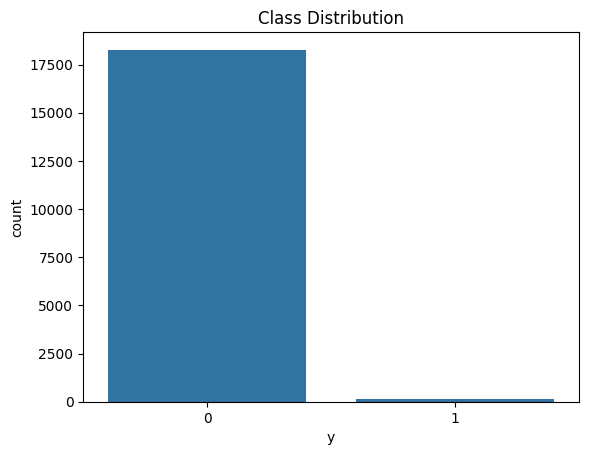

In [9]:
# Target variable distribution
sns.countplot(data=df, x='y')
plt.title('Class Distribution')
plt.show()

### **Above count plot showcase data distribution showing highly imbalance data in target column**

<ipython-input-10-55ac87508cee>:2: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df.resample('H')['y'].sum().plot(title='Anomalies Over Time', figsize=(10, 6))


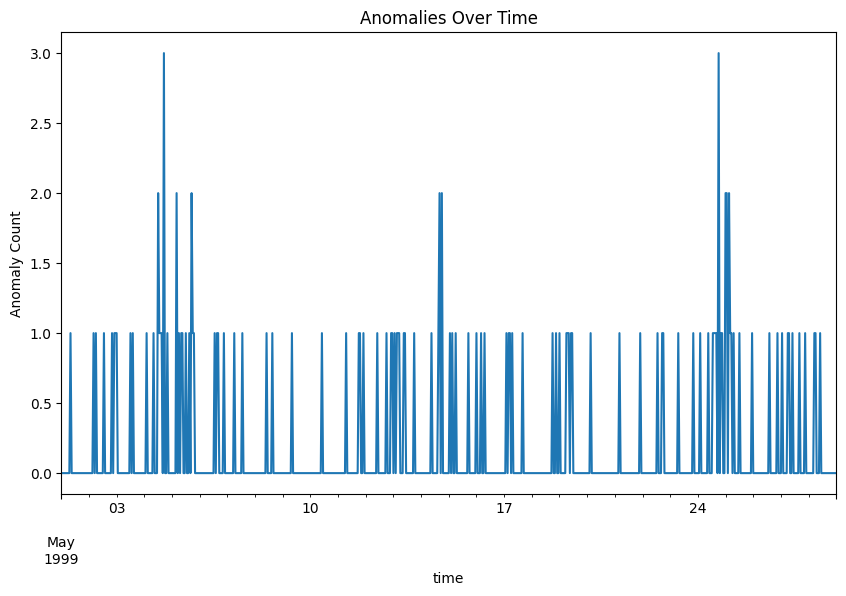

In [10]:
# Check for anomalies over time
df.resample('H')['y'].sum().plot(title='Anomalies Over Time', figsize=(10, 6))
plt.ylabel('Anomaly Count')
plt.show()

# **Feature Engineering**

In [11]:
# Extract datetime features
df['hour'] = df.index.hour
df['day'] = df.index.day
df['weekday'] = df.index.weekday

In [12]:
# Create rolling features for a few key columns
df['x1_rolling_mean'] = df['x1'].rolling(window=5).mean()
df['x1_diff'] = df['x1'].diff()

In [13]:
# Fill NaN values created by rolling/diff
df.fillna(method='bfill', inplace=True)

<ipython-input-13-b0bfe321f281>:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='bfill', inplace=True)


# **Train-Test Split**

In [14]:
# Split predictors and target
X = df.drop(columns=['y'])
y = df['y']

In [15]:
# Standardize numeric features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [16]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, stratify=y, random_state=42)

## **Handling imbalance data using Oversamspling technique SMOTE**

In [17]:
!pip  install imblearn

In [18]:
from imblearn.over_sampling import SMOTE

# Apply SMOTE to oversample the minority class
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

# Check the class distribution after resampling
print("Class distribution after SMOTE:")
print(pd.Series(y_resampled).value_counts())


Class distribution after SMOTE:
y
0    14619
1    14619
Name: count, dtype: int64


# **Model Training and Evaluation**

## **Random Forest Classifier**

In [19]:
# Initialize and train a Random Forest Classifier
clf = RandomForestClassifier(random_state=42, class_weight='balanced')
clf.fit(X_resampled, y_resampled)

RandomForestClassifier(class_weight='balanced', random_state=42)

In [20]:
# Make predictions
y_pred = clf.predict(X_test)
y_prob = clf.predict_proba(X_test)[:, 1]

In [21]:
# Evaluate the model
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("ROC-AUC Score:", roc_auc_score(y_test, y_prob))

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      3655
           1       0.77      0.68      0.72        25

    accuracy                           1.00      3680
   macro avg       0.89      0.84      0.86      3680
weighted avg       1.00      1.00      1.00      3680

Confusion Matrix:
 [[3650    5]
 [   8   17]]
ROC-AUC Score: 0.9824897400820793


### **Hyperparameter Tuning**

In [22]:
# Define hyperparameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5, 10]
}

In [23]:
# Grid Search with cross-validation
grid_search = GridSearchCV(clf, param_grid, cv=3, scoring='roc_auc', verbose=1)
grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 27 candidates, totalling 81 fits


GridSearchCV(cv=3,
             estimator=RandomForestClassifier(class_weight='balanced',
                                              random_state=42),
             param_grid={'max_depth': [10, 20, None],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]},
             scoring='roc_auc', verbose=1)

In [24]:
# Best parameters and evaluation
print("Best Parameters:", grid_search.best_params_)
best_model = grid_search.best_estimator_

Best Parameters: {'max_depth': None, 'min_samples_split': 10, 'n_estimators': 300}


In [25]:
# Evaluate tuned model
y_tuned_pred = best_model.predict(X_test)
y_tuned_prob = best_model.predict_proba(X_test)[:, 1]
print("Tuned Model ROC-AUC Score:", roc_auc_score(y_test, y_tuned_prob))

Tuned Model ROC-AUC Score: 0.969127222982216


## **Logistic regression**

In [26]:
from sklearn.linear_model import LogisticRegression
# Logistic Regression
lr = LogisticRegression(random_state=42, class_weight='balanced', max_iter=1000)
lr.fit(X_resampled, y_resampled)

LogisticRegression(class_weight='balanced', max_iter=1000, random_state=42)

In [27]:
y_pred_lr = lr.predict(X_test)
y_prob_lr = lr.predict_proba(X_test)[:, 1]

In [28]:
print("Logistic Regression:")
print("Classification Report:\n", classification_report(y_test, y_pred_lr))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_lr))
print("ROC-AUC Score:", roc_auc_score(y_test, y_prob_lr))

Logistic Regression:
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.88      0.94      3655
           1       0.05      0.88      0.09        25

    accuracy                           0.88      3680
   macro avg       0.52      0.88      0.52      3680
weighted avg       0.99      0.88      0.93      3680

Confusion Matrix:
 [[3234  421]
 [   3   22]]
ROC-AUC Score: 0.9411655266757866


## **Decision Tree**

In [29]:
from sklearn.tree import DecisionTreeClassifier
# Decision Tree
dt = DecisionTreeClassifier(random_state=42, class_weight='balanced')
dt.fit(X_resampled, y_resampled)

DecisionTreeClassifier(class_weight='balanced', random_state=42)

In [30]:
y_pred_dt = dt.predict(X_test)
y_prob_dt = dt.predict_proba(X_test)[:, 1]

In [31]:
print("Decision Tree:")
print("Classification Report:\n", classification_report(y_test, y_pred_dt))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_dt))
print("ROC-AUC Score:", roc_auc_score(y_test, y_prob_dt))

Decision Tree:
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.99      0.99      3655
           1       0.34      0.52      0.41        25

    accuracy                           0.99      3680
   macro avg       0.67      0.76      0.70      3680
weighted avg       0.99      0.99      0.99      3680

Confusion Matrix:
 [[3630   25]
 [  12   13]]
ROC-AUC Score: 0.7565800273597811


## **GBC**

In [32]:
# Gradient Boosting Classifier
from sklearn.ensemble import GradientBoostingClassifier

gbc = GradientBoostingClassifier(random_state=42)
gbc.fit(X_resampled, y_resampled)

GradientBoostingClassifier(random_state=42)

In [33]:
y_pred_gbc = gbc.predict(X_test)
y_prob_gbc = gbc.predict_proba(X_test)[:, 1]

In [34]:
print("Gradient Boosting:")
print("Classification Report:\n", classification_report(y_test, y_pred_gbc))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_gbc))
print("ROC-AUC Score:", roc_auc_score(y_test, y_prob_gbc))

Gradient Boosting:
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.99      0.99      3655
           1       0.32      0.84      0.46        25

    accuracy                           0.99      3680
   macro avg       0.66      0.91      0.73      3680
weighted avg       0.99      0.99      0.99      3680

Confusion Matrix:
 [[3610   45]
 [   4   21]]
ROC-AUC Score: 0.9880930232558139


## **SVM**

In [35]:
from sklearn.svm import SVC

# Support Vector Machine
svm = SVC(probability=True, random_state=42, class_weight='balanced')
svm.fit(X_resampled, y_resampled)

SVC(class_weight='balanced', probability=True, random_state=42)

In [36]:
y_pred_svm = svm.predict(X_test)
y_prob_svm = svm.predict_proba(X_test)[:, 1]

In [37]:
print("Support Vector Machine:")
print("Classification Report:\n", classification_report(y_test, y_pred_svm))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_svm))
print("ROC-AUC Score:", roc_auc_score(y_test, y_prob_svm))

Support Vector Machine:
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.96      0.98      3655
           1       0.09      0.48      0.15        25

    accuracy                           0.96      3680
   macro avg       0.54      0.72      0.56      3680
weighted avg       0.99      0.96      0.97      3680

Confusion Matrix:
 [[3527  128]
 [  13   12]]
ROC-AUC Score: 0.8617400820793433


## **KNN**

In [38]:
from sklearn.neighbors import KNeighborsClassifier
# K-Nearest Neighbors
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_resampled, y_resampled)

KNeighborsClassifier()

In [39]:
y_pred_knn = knn.predict(X_test)
y_prob_knn = knn.predict_proba(X_test)[:, 1]

In [40]:
print("K-Nearest Neighbors:")
print("Classification Report:\n", classification_report(y_test, y_pred_knn))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_knn))
print("ROC-AUC Score:", roc_auc_score(y_test, y_prob_knn))

K-Nearest Neighbors:
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.99      0.99      3655
           1       0.28      0.44      0.34        25

    accuracy                           0.99      3680
   macro avg       0.64      0.72      0.67      3680
weighted avg       0.99      0.99      0.99      3680

Confusion Matrix:
 [[3626   29]
 [  14   11]]
ROC-AUC Score: 0.7344186046511628


## **XGBoost**

In [41]:
from xgboost import XGBClassifier
# XGBoost Classifier
xgb = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')
xgb.fit(X_resampled, y_resampled)

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [09:00:01] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, random_state=42, ...)

In [42]:
y_pred_xgb = xgb.predict(X_test)
y_prob_xgb = xgb.predict_proba(X_test)[:, 1]

In [43]:
print("XGBoost:")
print("Classification Report:\n", classification_report(y_test, y_pred_xgb))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_xgb))
print("ROC-AUC Score:", roc_auc_score(y_test, y_prob_xgb))

XGBoost:
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      3655
           1       0.72      0.84      0.78        25

    accuracy                           1.00      3680
   macro avg       0.86      0.92      0.89      3680
weighted avg       1.00      1.00      1.00      3680

Confusion Matrix:
 [[3647    8]
 [   4   21]]
ROC-AUC Score: 0.9893734610123119


# **Accuracy Summary**

In [45]:
from sklearn.metrics import precision_score

In [48]:
performance_summary = pd.DataFrame({
    'Model':['LR','SVC','KNN','DT','RF','GBC','XGB'],
    'ACC':[accuracy_score(y_test,y_pred_lr),
           accuracy_score(y_test,y_pred_svm),
           accuracy_score(y_test,y_pred_knn),
           accuracy_score(y_test,y_pred_dt),
           accuracy_score(y_test,y_pred),
           accuracy_score(y_test,y_pred_gbc),
           accuracy_score(y_test,y_pred_xgb)
          ],
    'Prec':[precision_score(y_test,y_pred_lr),
            precision_score(y_test,y_pred_svm),
            precision_score(y_test,y_pred_knn),
            precision_score(y_test,y_pred_dt),
            precision_score(y_test,y_pred),
            precision_score(y_test,y_pred_gbc),
            precision_score(y_test,y_pred_xgb)
           ],
    'AUC':[roc_auc_score(y_test,y_prob_lr),
           roc_auc_score(y_test,y_prob_svm),
           roc_auc_score(y_test,y_prob_knn),
           roc_auc_score(y_test,y_prob_dt),
           roc_auc_score(y_test,y_prob),
           roc_auc_score(y_test,y_prob_gbc),
           roc_auc_score(y_test,y_prob_xgb)
          ],
})

In [50]:
performance_summary

Model       ACC      Prec       AUC
0    LR  0.884783  0.049661  0.941166
1   SVC  0.961685  0.085714  0.861740
2   KNN  0.988315  0.275000  0.734419
3    DT  0.989946  0.342105  0.756580
4    RF  0.996467  0.772727  0.982490
5   GBC  0.986685  0.318182  0.988093
6   XGB  0.996739  0.724138  0.989373

## **Model use summary** :
*   Best Model: Random Forest (RF) or XGBoost (XGB):

*   RF: Slightly higher precision; robust performance across metrics.
*   XGB: Slightly higher AUC; excellent for nuanced class separation.


*   RF if precision (correct positive predictions) is critical, and XGB if AUC (overall discriminatory power) is more important.


*   Here we are usding RF because :

        1. Correct positive predictions
        2. Overall discriminatory power



# **Save Best Model and Deploy the Model**

In [51]:
import joblib

# Save the model
joblib.dump(best_model, 'anomaly_detection_model.pkl')

# Load the model (for inference)
loaded_model = joblib.load('anomaly_detection_model.pkl')
